# Carregamento dos dados

In [109]:
import pandas as pd

file_path = 'C:\Users\dougl\OneDrive\Desktop\CD2\Base\apps_reviews_validacao.xlsx - apps_reviews.csv'
comentarios = pd.read_csv(file_path, usecols=['reviewId', 'app_name', 'content', 'sentiment_polarity', 'sentiment']) # Ignorando última coluna nula.

comentarios.head(5)


,reviewId,app_name,content,sentiment_polarity,sentiment
0,01e23c15-44bf-46b7-b280-40e880d9d49b,Shopee,O app da Shopee é razoável. Apesar de ser fáci...,positive,sadness
1,df40ba7c-075d-48dc-b798-21466dfb41d6,Shopee,"O app é bem otimizado, fácil de visualizar os ...",positive,sadness
2,59490b23-b17b-4bba-855b-b5053dadc0db,Shopee,"O app é muito bom, prático e fácil de entender...",positive,sadness
3,48fd8168-1e42-4475-9a99-935c2fd48769,Shopee,Aplicativo muito bom. Mas algo que me chateou ...,positive,sadness
4,f4e1468b-6d97-4f1a-927d-1afee2bfbe75,Shopee,"o app é muito bom, porém tenho tido dificuldad...",negative,disgust


In [110]:
comentarios.describe()

,reviewId,app_name,content,sentiment_polarity,sentiment
count,3011,3011,3011,3011,3011
unique,3011,10,3011,3,7
top,b2ca0eda-2492-411f-b5be-e81071f52122,Shopee,O reconhecimento facial simplesmente não funci...,negative,disgust
freq,1,303,1,1742,952


In [111]:
comentarios.loc[4, 'content']

'o app é muito bom, porém tenho tido dificuldades para pagamento no cartão de crédito após fazer compra no pix. Eu altero o meio de pagamento porém quando chega na parte de colocar o código do cartão trava e não sai daquela área... já deixei de fazer muitas compras por conta disso. Se puderem concertar esse bug séria ótimo para nós consumidores.'

# Pré-processamento

<p style="color:green">Removendo todo e qualquer caracter que não seja latino</p>

In [112]:
import regex 

comentarios['content'] = comentarios['content'].apply(lambda x: regex.sub('[^\p{Latin}]', u' ', str(x)))

In [113]:
comentarios.loc[4, 'content']

'o app é muito bom  porém tenho tido dificuldades para pagamento no cartão de crédito após fazer compra no pix  Eu altero o meio de pagamento porém quando chega na parte de colocar o código do cartão trava e não sai daquela área    já deixei de fazer muitas compras por conta disso  Se puderem concertar esse bug séria ótimo para nós consumidores '

<p style="color:green">Colocando todos os textos para minúsculo</p>

In [114]:
comentarios['content'] = comentarios['content'].apply(lambda x: str(x).lower())

In [115]:
comentarios.loc[4, 'content']

'o app é muito bom  porém tenho tido dificuldades para pagamento no cartão de crédito após fazer compra no pix  eu altero o meio de pagamento porém quando chega na parte de colocar o código do cartão trava e não sai daquela área    já deixei de fazer muitas compras por conta disso  se puderem concertar esse bug séria ótimo para nós consumidores '

<p style="color:green">Função para remover stopwords mais facilmente no datafreme</p>

In [116]:
import nltk 
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

nltk.download('stopwords')
nltk.download('punkt')

def remove_stopwords(texto):
    stops_list = stopwords.words("portuguese")
    word_tokens = word_tokenize(texto)
    texto_sem_stops = [w for w in word_tokens if w not in stops_list]
    return " ".join(texto_sem_stops)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\dougl\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\dougl\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


<p style="color:green">Remover stopwords usando a função definida acima</p>

In [117]:
comentarios['content'] = comentarios['content'].apply(remove_stopwords)

In [118]:
comentarios.loc[4, 'content']

'app bom porém tido dificuldades pagamento cartão crédito após fazer compra pix altero meio pagamento porém chega parte colocar código cartão trava sai daquela área deixei fazer muitas compras conta disso puderem concertar bug séria ótimo consumidores'

# Extração da features (representação de texto em formato vetorial)

<p style="color:green">A seguir, faremos a instanciação do método que fará a representação do texto usando o modelo TF-IDF.</p> 

In [119]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()

In [120]:
tfidf_matrix = tfidf_vectorizer.fit_transform(comentarios['content'])

In [121]:
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())
tfidf_df

,aap,aba,abaixa,abaixada,abaixado,abaixar,abaixaram,abaixe,abaixei,abaixem,...,últimamente,últimas,último,últimos,única,únicas,único,únicos,úteis,útil
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3006,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3007,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3008,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3009,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


<p style="color:green">Conferir se as linhas contém valores diferentes de zero.</p> 

In [122]:
non_zero_counts = (tfidf_df != 0).sum(axis=1)
non_zero_counts.head()


0    44
1    38
2    33
3    41
4    33
dtype: int64

# Treinamento e teste

<p style="color:green">Aqui vamos estimar a performance do classificador utilizando uma subdivisão nos dados. Vamos dividir os dados (tfidf_df) em um conjunto de teste e outro treinamento. </p>

In [123]:
categorias = comentarios[['sentiment_polarity', 'sentiment']]

In [124]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(tfidf_df, categorias, test_size=0.2) #20% para teste.

y_train_polarity = y_train['sentiment_polarity']
y_test_polarity = y_test['sentiment_polarity']
y_train_sentiment = y_train['sentiment']
y_test_sentiment = y_test['sentiment']

In [125]:
from sklearn.naive_bayes import MultinomialNB

naive_bayes_polarity = MultinomialNB()
naive_bayes_sentiment = MultinomialNB()

naive_bayes_polarity.fit(X_train, y_train_polarity)
naive_bayes_sentiment.fit(X_train, y_train_sentiment)

predicoes_polarity = naive_bayes_polarity.predict(X_test)
predicoes_sentiment = naive_bayes_sentiment.predict(X_test)

In [126]:
from sklearn.metrics import classification_report

print("\nAvaliação para 'sentiment':")
print(classification_report(y_test_sentiment, predicoes_sentiment))


Avaliação para 'sentiment':
              precision    recall  f1-score   support

       anger       0.72      0.39      0.51       149
     disgust       0.54      0.76      0.63       201
        fear       0.00      0.00      0.00        10
   happiness       0.00      0.00      0.00        63
     neutral       0.00      0.00      0.00        14
     sadness       0.51      0.76      0.61       164
    surprise       0.00      0.00      0.00         2

    accuracy                           0.56       603
   macro avg       0.25      0.27      0.25       603
weighted avg       0.50      0.56      0.50       603



c:\Users\dougl\OneDrive\Desktop\CD2\venv\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\dougl\OneDrive\Desktop\CD2\venv\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\dougl\OneDrive\Desktop\CD2\venv\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(r

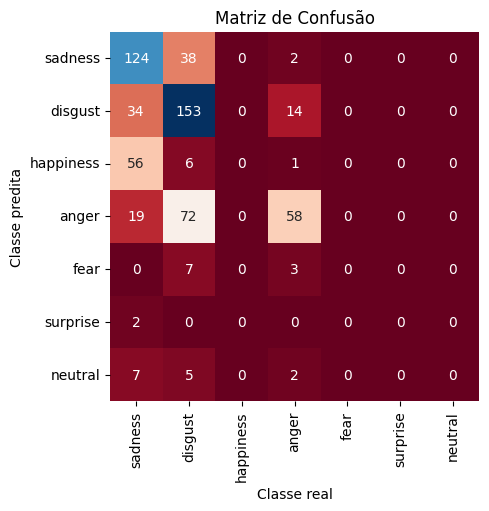

In [127]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

sentiment_labels = comentarios['sentiment'].unique()

cm = confusion_matrix(y_test_sentiment, predicoes_sentiment, labels=sentiment_labels)

sns.heatmap(cm, square=True, annot=True, fmt='d',cmap='RdBu', cbar=False, 
            xticklabels=sentiment_labels,
            yticklabels=sentiment_labels)

plt.xlabel("Classe real")
plt.ylabel("Classe predita")
plt.title("Matriz de Confusão")
plt.show()


In [128]:
from sklearn.metrics import classification_report

print("\nAvaliação para 'polarity':")
print(classification_report(y_test_polarity, predicoes_polarity))


Avaliação para 'polarity':
              precision    recall  f1-score   support

    negative       0.77      0.95      0.85       360
     neutral       0.00      0.00      0.00        14
    positive       0.87      0.59      0.71       229

    accuracy                           0.79       603
   macro avg       0.55      0.52      0.52       603
weighted avg       0.79      0.79      0.78       603



c:\Users\dougl\OneDrive\Desktop\CD2\venv\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\dougl\OneDrive\Desktop\CD2\venv\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\dougl\OneDrive\Desktop\CD2\venv\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(r

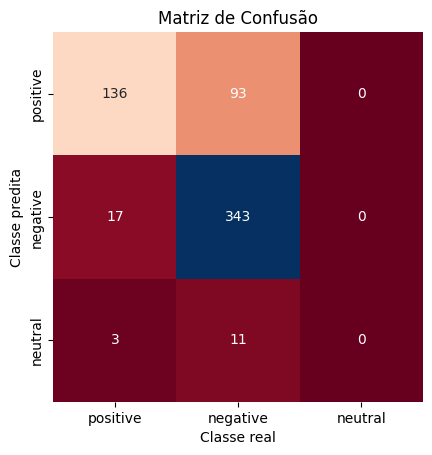

In [129]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

sentiment_labels_pol = comentarios['sentiment_polarity'].unique()

cm = confusion_matrix(y_test_polarity, predicoes_polarity, labels=sentiment_labels_pol)

sns.heatmap(cm, square=True, annot=True, fmt='d',cmap='RdBu', cbar=False, 
            xticklabels=sentiment_labels_pol,
            yticklabels=sentiment_labels_pol)

plt.xlabel("Classe real")
plt.ylabel("Classe predita")
plt.title("Matriz de Confusão")
plt.show()